In [13]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import random

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(30, input_dim=784, activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='bce',
              metrics=['accuracy'])

In [15]:


max_moves = 30  #how many inverse operations on the final destination
goal_position = torch.tensor([[1], [0]], dtype=torch.float64) #start with a 2 x 1 

def data_generator(matrix_T, matrix_U, num_of_datapoints):
    inverse_T = torch.inverse(matrix_T)
    inverse_U = torch.inverse(matrix_U)
    data = torch.empty((num_of_datapoints, 3), dtype=torch.int32)
    for i in range(num_of_datapoints):
        start = goal_position
        moves = random.randint(1, max_moves)
        coin = 5
        for q in range(moves):
            if coin == 0:
                #  print(start, inverse_U, "=")
                start = torch.matmul(matrix_T, start)
                coin = random.randint(0, 3)
                while coin == 2: 
                    coin = random.randint(0, 3)
            #  print(start)
            if coin == 1:
                #  print(start, inverse_T, "=")
                start = torch.matmul(matrix_U, start)
                coin = random.randint(0, 3)
                while coin == 3: 
                    coin = random.randint(0, 3)
            if coin == 2:
                #  print(start, inverse_U, "=")
                start = torch.matmul(inverse_T, start)
                coin = random.randint(0, 3)
                while coin == 0: 
                    coin = random.randint(0, 3)
            #  print(start)
            else:
                #  print(start, inverse_T, "=")
                start = torch.matmul(inverse_U, start)
                coin = random.randint(0, 3)
                while coin == 1: 
                    coin = random.randint(0, 3)
            # print(start)
        # print("done")
        data[i, 0] = start[0]
        data[i, 1] = start[1]
        data[i, 2] = coin
    return data

#https://stackoverflow.com/questions/36158058/torch-save-tensor-to-csv-file#:~:text=For%20simple%20tables%2C%20you%20can,then%20to%20a%20Pandas%20dataframe.&text=You%20can%20first%20convert%20the,table%20as%20a%20csv%20file.

matrix_T = torch.tensor([[1, 3], [0, 1]], dtype=torch.float64)
matrix_U = torch.tensor([[1, 0], [3, 1]], dtype=torch.float64)

data = data_generator(matrix_T, matrix_U, 100000)
data_table = data.numpy()

x_train = data_table[:, :-1]
y_train_number = data_table[:, -1]

# matrix_T = torch.tensor([[0, -1], [1, 0]], dtype=torch.float64)
# matrix_U = torch.tensor([[1, 1], [0, 1]], dtype=torch.float64)

data = data_generator(matrix_T, matrix_U, 100000)
data_table = data.numpy()

x_test = data_table[:, :-1]
y_test_number = data_table[:, -1]

In [16]:
# One hot encoding 
# some parts from chat GPT 
y_train = []

def one_hot_encode(number):
    if number < 0 or number > 3:
        raise ValueError("Number must be between 0 and 3.")
    
    encoding = np.zeros((1, 4))  # Initialize the encoding vector with all zeros
    encoding[0][number] = 1    # Set the value at the index corresponding to the number to 1
    return encoding

for i in range(len(y_train_number)):
    y_train.append(one_hot_encode(y_train_number[i]))

# Convert the list to a NumPy array
y_train = np.array(y_train)
y_train = y_train.reshape((len(y_train_number), 4))

y_test = []

def one_hot_encode(number):
    if number < 0 or number > 3:
        raise ValueError("Number must be between 0 and 3.")
    
    encoding = np.zeros((1, 4))  # Initialize the encoding vector with all zeros
    encoding[0][number] = 1    # Set the value at the index corresponding to the number to 1
    return encoding

for i in range(len(y_test_number)):
    y_test.append(one_hot_encode(y_test_number[i]))

# Convert the list to a NumPy array
y_test = np.array(y_test)
y_test = y_test.reshape((len(y_test_number), 4))

In [17]:
x_train

array([[        37,         -3],
       [       -71,        240],
       [     -2132,        375],
       ...,
       [-125480132,  329907813],
       [      3142,      -9681],
       [       631,        234]], dtype=int32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(128, input_dim=2, activation = 'sigmoid'))
model.add(Dense(64,  activation = 'sigmoid'))
model.add(Dense(16, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))


model.compile(optimizer='adam',
              loss='bce',
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=100, batch_size=100)

Epoch 1/100


1000/1000 [==============================] - 2s 2ms/step - loss: 0.5310 - accuracy: 0.3313
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5159 - accuracy: 0.3332
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5152 - accuracy: 0.3341
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5151 - accuracy: 0.3309
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5150 - accuracy: 0.3318
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5153 - accuracy: 0.3327
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.3354
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5149 - accuracy: 0.3323
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5149 - accuracy: 0.3308
Epoch 10/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5148 

In [20]:
score = model.evaluate(x_test, y_test, batch_size=100)
print(score[0])
print(score[1])

1000/1000 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.3297
0.5133081674575806
0.3296999931335449


In [21]:
model.save('full_model.h5')

1/1 [==============================] - 0s 29ms/step


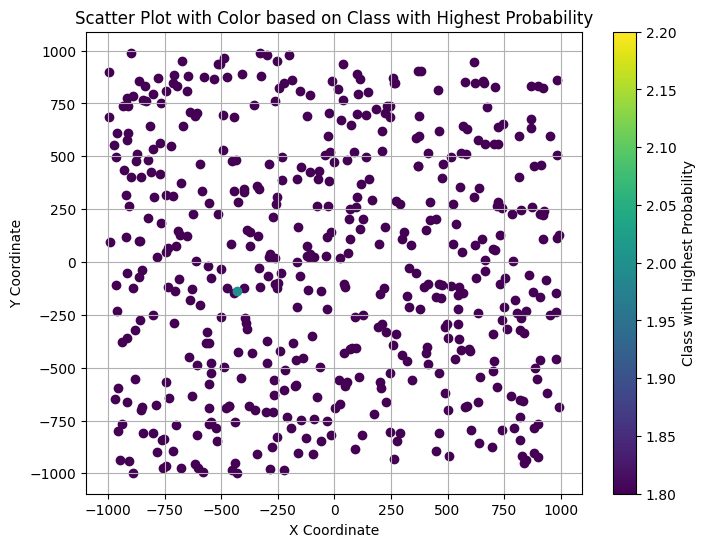

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = random.randint(-1000, 1000)
y = random.randint(-1000, 1000)

# Example model output with shape (100, 4)
model_output = model.predict(torch.tensor([[x, y]]).numpy())  # Example model output with shape (100, 4)

# Scatter plot
plt.figure(figsize=(8, 6))

# Iterate over the loop to generate coordinates one at a time
for i in range(500):
    # Generate x and y coordinates one at a time
    x = random.randint(-1000, 1000)
    y = random.randint(-1000, 1000)

# Example model output with shape (100, 4)
    model_output = model.predict(torch.tensor([[x, y]]).numpy())  # Example model output with shape (100, 4)
    # Find the index of the maximum probability for this point
    max_prob_index = np.argmax(model_output)
    
    # Plot the point with color based on the class with highest probability
    plt.scatter(x, y, c=max_prob_index, cmap='viridis')

plt.colorbar(label='Class with Highest Probability')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot with Color based on Class with Highest Probability')
plt.grid(True)
plt.show()
